
# VAE KNN MODEL


In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv (r'C:/Users/Boaz/Documents/new_data_label.csv')
del dataset['Unnamed: 0']
del dataset['event_date']
dataset.loc[dataset['labels'] != 0, 'labels'] = 1
dataset.loc[dataset['labels'] == 0, 'labels'] = 0
print(dataset)


data = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del data['Unnamed: 0']
del data['event_date']
del data['labels']
print(data)

       response_time  response_size  session_duration  response_errorcode_num  \
0             718444      750197670                 2                       0   
1            1051741      794574705                 1                       0   
2             666003      445975743                 0                       0   
3             939968      342481634                 0                       0   
4            1059742      316304423                 0                       0   
...              ...            ...               ...                     ...   
61339        1654815      986044166                 2                       0   
61340        1080735      942590486                 0                       0   
61341        1266569      887658828                 4                       0   
61342         555966      850409314                 0                       0   
61343        1603774     1005933723                 2                       0   

       response_failure_num

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, dataset['labels'], test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

In [3]:
from sklearn import datasets
import pandas as pd
datasetknn = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del datasetknn['Unnamed: 0']
del datasetknn['event_date']
print(dataset)


dataknn = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del dataknn['Unnamed: 0']
del dataknn['event_date']
del dataknn['labels']
print(dataknn)

       response_time  response_size  session_duration  response_errorcode_num  \
0             718444      750197670                 2                       0   
1            1051741      794574705                 1                       0   
2             666003      445975743                 0                       0   
3             939968      342481634                 0                       0   
4            1059742      316304423                 0                       0   
...              ...            ...               ...                     ...   
61339        1654815      986044166                 2                       0   
61340        1080735      942590486                 0                       0   
61341        1266569      887658828                 4                       0   
61342         555966      850409314                 0                       0   
61343        1603774     1005933723                 2                       0   

       response_failure_num

In [4]:
from sklearn.model_selection import train_test_split
X_trainknn, X_testknn, y_trainknn, y_testknn = train_test_split(dataknn, datasetknn['labels'], test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

In [5]:
knn_train= X_trainknn
knn_train['labels'] = y_trainknn
knn_new = knn_train[knn_train['labels']!= 0]
knn_new

y_train_knn_new = knn_new['labels']
X_train_knn_new = knn_new

del X_train_knn_new['labels']
X_train_knn_new

C:\Users\Boaz\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,response_time,response_size,session_duration,response_errorcode_num,response_failure_num
5526,1386061,730136162,5,0,0
32324,4530654,706178616,6,6,6
60215,3291060,525828203,7,0,0
35467,124924,659944403,0,2,2
22179,1647148,332206856,0,4,4
...,...,...,...,...,...
7854,1537668,377008742,2,2,2
8188,10288759,168445983,8,0,0
28344,2474839,748441225,5,0,0
59225,1179191,73756576,1,1,1


In [6]:
# -*- coding: utf-8 -*-
"""Example of using Variational Auto Encoder for outlier detection
"""
# Author: Andrij Vasylenko <andrij@liverpool.ac.uk>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier

import os
import time
import sys
t = time.time()

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.vae import VAE
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

if __name__ == "__main__":
    contamination = 0.23  # percentage of outliers
    n_train = 42940  # number of training points
    n_test = 18404  # number of testing points
    n_features = 5  # number of features
    
    #print(X_train)
    #print(y_train)
    # train VAE detector (Beta-VAE)
    clf_name = 'VAE'
    clf = VAE(epochs=30, contamination=contamination, gamma=0.8, capacity=0.2,encoder_neurons=[5,3,2])
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
    elapsed2 = time.time() - t
    clf2 = KNeighborsClassifier()

    clf2.fit(X_train_knn_new, y_train_knn_new)

    y_pred_test_knn = clf2.predict(X_testknn)
elapsed = time.time() - t
    

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 5)            30          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 5)            30          dense[0][0]                      
__________________________________________________________________________________________________
dropout (Dropout)               (None, 5)            0           dense_1[0][0]                    
______________________________________________________________________________________________

1208/1208 [==============================] - 3s 2ms/step - loss: 5.1706 - val_loss: 4.4391
Epoch 2/30
1208/1208 [==============================] - 2s 2ms/step - loss: 5.0736 - val_loss: 4.4384
Epoch 3/30
1208/1208 [==============================] - 2s 2ms/step - loss: 5.0721 - val_loss: 4.4382
Epoch 4/30
1208/1208 [==============================] - 2s 2ms/step - loss: 5.0720 - val_loss: 4.4383
Epoch 5/30
1208/1208 [==============================] - 2s 2ms/step - loss: 5.0768 - val_loss: 4.4384
Epoch 6/30
1208/1208 [==============================] - 2s 2ms/step - loss: 5.0727 - val_loss: 4.4382
Epoch 7/30
1208/1208 [==============================] - 2s 2ms/step - loss: 5.0750 - val_loss: 4.4383
Epoch 8/30
1208/1208 [==============================] - 2s 2ms/step - loss: 5.0721 - val_loss: 4.4382
Epoch 9/30
1208/1208 [==============================] - 2s 1ms/step - loss: 5.0721 - val_loss: 4.4383
Epoch 10/30
1208/1208 [==============================] - 2s 1ms/step - loss: 5.0721 - val_los


F1 score AE model:
0.8624918248491406

Precision score AE model:
0.8623493171732882

Recall score AE model:
0.8626385568354705

Duration in seconds:
61.207096576690674


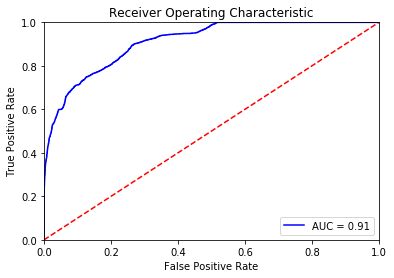

In [7]:
from sklearn import metrics
import matplotlib.pyplot as plt
print('\nF1 score AE model:')
print(metrics.f1_score(y_test, y_test_pred, average='weighted'))
print('\nPrecision score AE model:')
print(metrics.precision_score(y_test, y_test_pred, average='weighted'))
print('\nRecall score AE model:')
print(metrics.recall_score(y_test, y_test_pred, average='weighted'))
print('\nDuration in seconds:')
print(elapsed2)
# method I: plt
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
# Detection model training set contains 0,1
# Test set contains 0,1
# Classification model training set only anomalies (1,3,5,6,7)
# Test the same but the 1 are divided into 1,3,5,6,7
# If you multiply each value, then you will keep the 0 found from detection model and only the 1 from
# detection would be classified

from sklearn import metrics
result = y_pred_test_knn * y_test_pred
result
# print(y_pred_test_knn)
# print(y_test_pred)
# print(result)
print("F1:",metrics.f1_score(y_testknn,result,labels=[0,1,3,5,6,7],average=None))
print("Precision:",metrics.precision_score(y_testknn,result,labels=[0,1,3,5,6,7],average='weighted'))
print("Recall:",metrics.recall_score(y_testknn,result,labels=[0,1,3,5,6,7],average='weighted'))

#np.unique(result,return_counts = True)
print('\nDuration in seconds:')
print(elapsed)

F1: [0.91066506 0.83663366 0.31111111 0.02985075 0.33940828 0.125     ]
Precision: 0.7828350507857338
Recall: 0.7859161051945229

Duration in seconds:
61.61390280723572


In [9]:
metrics.multilabel_confusion_matrix(result, y_testknn, labels =[0,1,3,5,6,7])


array([[[ 2991,  1251],
        [ 1277, 12885]],

       [[17934,    14],
        [  118,   338]],

       [[15592,  1180],
        [ 1114,   518]],

       [[18338,    47],
        [   18,     1]],

       [[14896,  1383],
        [ 1408,   717]],

       [[18329,    65],
        [    5,     5]]], dtype=int64)

In [10]:
from sklearn.preprocessing import label_binarize

y_test_roc = label_binarize(y_testknn, classes=[0,1,3,5,6,7])
y_result_roc = label_binarize(result, classes=[0,1,3,5,6,7])
metrics.roc_auc_score(y_test_roc, y_result_roc, average=None, multi_class='ovr', labels=[0,1,3,5,6,7])

array([0.80614959, 0.9768453 , 0.61919108, 0.50992636, 0.6275347 ,
       0.53557793])

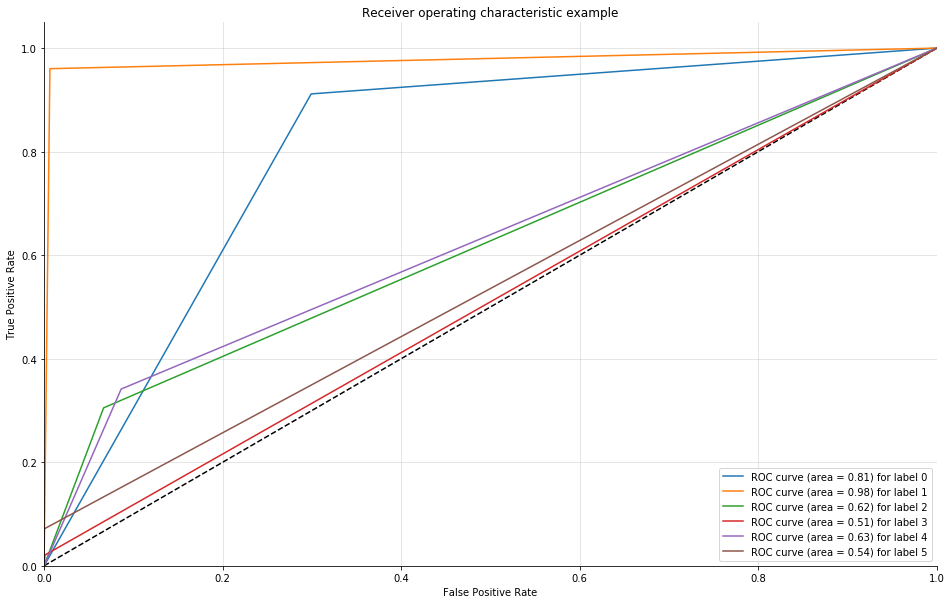

In [10]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

def plot_multiclass_roc(y_result, y_test, n_classes, figsize=(17, 6)):
    
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_roc = label_binarize(y_test, classes=[0, 1, 3, 5, 6, 7])
    y_result_roc = label_binarize(y_result, classes=[0, 1, 3, 5, 6, 7])
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_result_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(result, y_testknn, n_classes=6, figsize=(16, 10))

In [11]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[12885    10   575     2   663     1]
 [    0   338     1     9     0     4]
 [  433     1   518     1   745     0]
 [    0    47     0     1     0     0]
 [  844     0   538     1   717     0]
 [    0    60     0     5     0     5]]


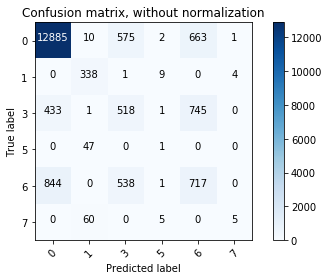

In [12]:
cnf_matrix = metrics.confusion_matrix(y_testknn, result,labels=[0, 1, 3, 5, 6, 7])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 3, 5, 6, 7],
                      title='Confusion matrix, without normalization')

## VAE SVM

In [14]:
import pandas as pd
import numpy as np
dataset = pd.read_csv (r'C:/Users/Boaz/Documents/new_data_label.csv')
del dataset['Unnamed: 0']
del dataset['event_date']
dataset.loc[dataset['labels'] != 0, 'labels'] = 1
dataset.loc[dataset['labels'] == 0, 'labels'] = 0
#print(dataset)


data = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del data['Unnamed: 0']
del data['event_date']
del data['labels']
#print(data)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, dataset['labels'], test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

In [16]:
from sklearn import datasets
import pandas as pd
datasetsvm = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del datasetsvm['Unnamed: 0']
del datasetsvm['event_date']
#print(dataset)


datasvm = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del datasvm['Unnamed: 0']
del datasvm['event_date']
del datasvm['labels']
#print(datasvm)

In [17]:
from sklearn.model_selection import train_test_split
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split(datasvm, datasetsvm['labels'], test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

In [18]:
svm_train= X_trainsvm
svm_train['labels'] = y_trainsvm
svm_new = svm_train[svm_train['labels']!= 0]
svm_new

y_train_svm_new = svm_new['labels']
X_train_svm_new = svm_new

del X_train_svm_new['labels']
X_train_svm_new

C:\Users\Boaz\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,response_time,response_size,session_duration,response_errorcode_num,response_failure_num
5526,1386061,730136162,5,0,0
32324,4530654,706178616,6,6,6
60215,3291060,525828203,7,0,0
35467,124924,659944403,0,2,2
22179,1647148,332206856,0,4,4
...,...,...,...,...,...
7854,1537668,377008742,2,2,2
8188,10288759,168445983,8,0,0
28344,2474839,748441225,5,0,0
59225,1179191,73756576,1,1,1


In [19]:
# -*- coding: utf-8 -*-
"""Example of using Variational Auto Encoder for outlier detection
"""
# Author: Andrij Vasylenko <andrij@liverpool.ac.uk>
# License: BSD 2 clause

from __future__ import division
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

import os
import time
import sys
t = time.time()

# temporary solution for relative imports in case pyod is not installed
# if pyod is installed, no need to use the following line
sys.path.append(
    os.path.abspath(os.path.join(os.path.dirname("__file__"), '..')))

from pyod.models.vae import VAE
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

if __name__ == "__main__":
    contamination = 0.23  # percentage of outliers
    n_train = 42940  # number of training points
    n_test = 18404  # number of testing points
    n_features = 5  # number of features
    
    #print(X_train)
    #print(y_train)
    # train VAE detector (Beta-VAE)
    clf_name = 'VAE'
    clf = VAE(epochs=30, contamination=contamination, gamma=0.8, capacity=0.2,encoder_neurons=[5,3,2])
    clf.fit(X_train)

    # get the prediction labels and outlier scores of the training data
    y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
    y_train_scores = clf.decision_scores_  # raw outlier scores

    # get the prediction on the test data
    y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
    y_test_scores = clf.decision_function(X_test)  # outlier scores
    elapsed2 = time.time() - t
    
    clf2 = svm.SVC(kernel='rbf',probability=True) 

#Train the model using the training sets
    clf2.fit(X_train_svm_new, y_train_svm_new)


#Predict the response for test dataset
    y_pred_test_svm = clf2.predict(X_testsvm)

elapsed = time.time() - t
    
    

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 5)            30          input_3[0][0]                    
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 5)            30          dense_11[0][0]                   
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 5)            0           dense_12[0][0]                   
____________________________________________________________________________________________

1208/1208 [==============================] - 3s 2ms/step - loss: 4.9990 - val_loss: 6.5393
Epoch 2/30
1208/1208 [==============================] - 2s 1ms/step - loss: 4.8402 - val_loss: 6.5179
Epoch 3/30
1208/1208 [==============================] - 2s 1ms/step - loss: 4.8342 - val_loss: 6.5150
Epoch 4/30
1208/1208 [==============================] - 2s 1ms/step - loss: 4.8286 - val_loss: 6.5143
Epoch 5/30
1208/1208 [==============================] - 2s 1ms/step - loss: 4.8274 - val_loss: 6.5139
Epoch 6/30
1208/1208 [==============================] - 2s 2ms/step - loss: 4.8272 - val_loss: 6.5140
Epoch 7/30
1208/1208 [==============================] - 2s 1ms/step - loss: 4.8388 - val_loss: 6.5138
Epoch 8/30
1208/1208 [==============================] - 2s 2ms/step - loss: 4.8270 - val_loss: 6.5138
Epoch 9/30
1208/1208 [==============================] - 2s 1ms/step - loss: 4.8272 - val_loss: 6.5138
Epoch 10/30
1208/1208 [==============================] - 2s 2ms/step - loss: 4.8270 - val_los

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt
print('\nF1 score AE model:')
print(metrics.f1_score(y_test, y_test_pred, average=None))
print('\nPrecision score AE model:')
print(metrics.precision_score(y_test, y_test_pred, average='weighted'))
print('\nRecall score AE model:')
print(metrics.recall_score(y_test, y_test_pred, average='weighted'))
print('\nDuration in seconds:')
print(elapsed2)



F1 score AE model:
[0.91 0.7 ]

Precision score AE model:
0.8623493171732882

Recall score AE model:
0.8626385568354705

Duration in seconds:
56.64905858039856


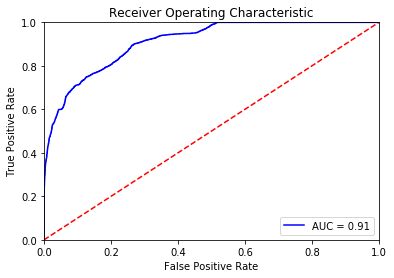

In [21]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
from sklearn import metrics
result = y_pred_test_svm * y_test_pred
result
# print(y_pred_test_knn)
# print(y_test_pred)
# print(result)
print("F1:",metrics.f1_score(y_testsvm,result,labels=[0,1,3,5,6,7],average=None))
print("Precision:",metrics.precision_score(y_testsvm,result,labels=[0,1,3,5,6,7],average='weighted'))
print("Recall:",metrics.recall_score(y_testsvm,result,labels=[0,1,3,5,6,7],average='weighted'))

#np.unique(result,return_counts = True)
print('\nDuration in seconds:')
print(elapsed)

F1: [0.91 0.79 0.03 0.   0.44 0.08]
Precision: 0.7682050338955202
Recall: 0.7878178656813736

Duration in seconds:
71.95388197898865


In [24]:
metrics.multilabel_confusion_matrix(result, y_testsvm, labels =[0,1,3,5,6,7])


array([[[ 2991,  1251],
        [ 1277, 12885]],

       [[17861,     1],
        [  191,   351]],

       [[16521,  1668],
        [  185,    30]],

       [[18356,    48],
        [    0,     0]],

       [[14052,   870],
        [ 2252,  1230]],

       [[18334,    67],
        [    0,     3]]], dtype=int64)

In [25]:
from sklearn.preprocessing import label_binarize

y_test_roc = label_binarize(y_testsvm, classes=[0,1,3,5,6,7])
y_result_roc = label_binarize(result, classes=[0,1,3,5,6,7])
metrics.roc_auc_score(y_test_roc, y_result_roc, average=None, multi_class='ovr', labels=[0,1,3,5,6,7])

array([0.81, 0.99, 0.5 , 0.5 , 0.72, 0.52])

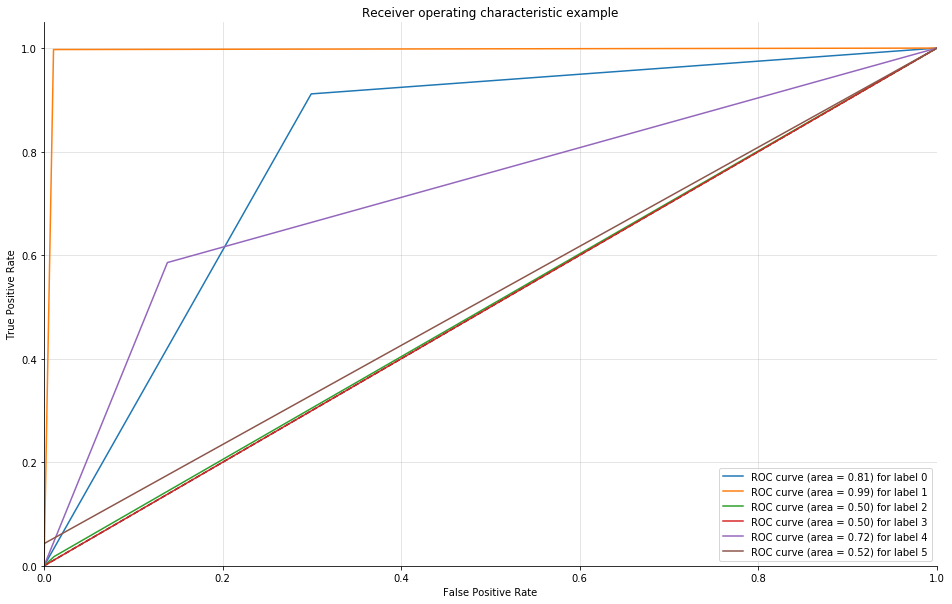

In [26]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

def plot_multiclass_roc(y_result, y_test, n_classes, figsize=(17, 6)):
    
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_roc = label_binarize(y_test, classes=[0, 1, 3, 5, 6, 7])
    y_result_roc = label_binarize(y_result, classes=[0, 1, 3, 5, 6, 7])
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_result_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(result, y_testsvm, n_classes=6, figsize=(16, 10))

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[12885    62   165     0  1024     0]
 [    0   351     0     0     1     0]
 [  433     8    30     0  1227     0]
 [    0    48     0     0     0     0]
 [  844     6    20     0  1230     0]
 [    0    67     0     0     0     3]]


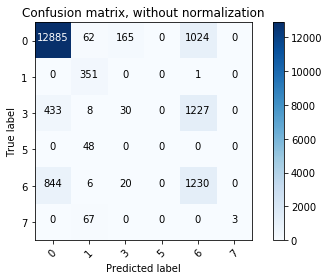

In [28]:
cnf_matrix = metrics.confusion_matrix(y_testsvm, result,labels=[0, 1, 3, 5, 6, 7])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 3, 5, 6, 7],
                      title='Confusion matrix, without normalization')

# ISOLATION FOREST KNN

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import KNeighborsClassifier

In [14]:
import pandas as pd
import numpy as np
dataset = pd.read_csv (r'C:/Users/Boaz/Documents/new_data_label.csv')
del dataset['Unnamed: 0']
del dataset['event_date']
dataset.loc[dataset['labels'] != 0, 'labels'] = 1
dataset.loc[dataset['labels'] == 0, 'labels'] = 0
#print(dataset)


data = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del data['Unnamed: 0']
del data['event_date']
del data['labels']
#print(data)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, dataset['labels'], test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

In [16]:
from sklearn import datasets
import pandas as pd
datasetknn = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del datasetknn['Unnamed: 0']
del datasetknn['event_date']
#print(datasetknn)


dataknn = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del dataknn['Unnamed: 0']
del dataknn['event_date']
del dataknn['labels']
#print(dataknn)

In [17]:
from sklearn.model_selection import train_test_split
X_trainknn, X_testknn, y_trainknn, y_testknn = train_test_split(dataknn, datasetknn['labels'], test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

In [18]:
knn_train= X_trainknn
knn_train['labels'] = y_trainknn
knn_new = knn_train[knn_train['labels']!= 0]
knn_new

y_train_knn_new = knn_new['labels']
X_train_knn_new = knn_new

del X_train_knn_new['labels']
X_train_knn_new

C:\Users\Boaz\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,response_time,response_size,session_duration,response_errorcode_num,response_failure_num
5526,1386061,730136162,5,0,0
32324,4530654,706178616,6,6,6
60215,3291060,525828203,7,0,0
35467,124924,659944403,0,2,2
22179,1647148,332206856,0,4,4
...,...,...,...,...,...
7854,1537668,377008742,2,2,2
8188,10288759,168445983,8,0,0
28344,2474839,748441225,5,0,0
59225,1179191,73756576,1,1,1


In [32]:
from sklearn import svm
import time
t = time.time()

model=IsolationForest(n_estimators=50, max_samples='auto', contamination=0.23,max_features=5)
model.fit(X_train)
y_pred = model.predict(X_test)
elapsed = time.time() - t
clf2 = KNeighborsClassifier()

clf2.fit(X_train_knn_new, y_train_knn_new)

y_pred_test_knn = clf2.predict(X_testknn)
elapsed2 = time.time() - t

In [33]:
for i in range(len(y_pred)):
    if y_pred[i] == 1:
         y_pred[i] = 0
    if y_pred[i] == -1:
         y_pred[i] = 1
print(y_pred)

[0 0 0 ... 0 0 0]


In [34]:

from sklearn import metrics

print('\nF1 score:')
print(metrics.f1_score(y_test, y_pred, average='weighted'))
print('\nPrecision score:')
print(metrics.precision_score(y_test, y_pred, average='weighted'))
print('\nRecall score:')
print(metrics.recall_score(y_test, y_pred, average='weighted'))
print('\nDuration in seconds:')
print(elapsed)


F1 score:
0.9139210886299022

Precision score:
0.9137643380187465

Recall score:
0.9140947620082591

Duration in seconds:
0.696768045425415


In [35]:
from sklearn import metrics
result = y_pred_test_knn * y_pred
result
# print(y_pred_test_knn)
# print(y_test_pred)
# print(result)
print("F1:",metrics.f1_score(y_testknn,result,labels=[0,1,3,5,6,7],average=None))
print("Precision:",metrics.precision_score(y_testknn,result,labels=[0,1,3,5,6,7],average='weighted'))
print("Recall:",metrics.recall_score(y_testknn,result,labels=[0,1,3,5,6,7],average='weighted'))

#np.unique(result,return_counts = True)
print('\nDuration in seconds:')
print(elapsed)

F1: [0.94 0.84 0.21 0.03 0.58 0.12]
Precision: 0.8268561168485691
Recall: 0.8309063247120191

Duration in seconds:
0.696768045425415


In [36]:
metrics.multilabel_confusion_matrix(result, y_testknn, labels =[0,1,3,5,6,7])


array([[[ 3453,   766],
        [  815, 13370]],

       [[17934,    14],
        [  118,   338]],

       [[15420,  1341],
        [ 1286,   357]],

       [[18338,    47],
        [   18,     1]],

       [[15434,   879],
        [  870,  1221]],

       [[18329,    65],
        [    5,     5]]], dtype=int64)

In [37]:
from sklearn.preprocessing import label_binarize

y_test_roc = label_binarize(y_testknn, classes=[0,1,3,5,6,7])
y_result_roc = label_binarize(result, classes=[0,1,3,5,6,7])
metrics.roc_auc_score(y_test_roc, y_result_roc, average=None, multi_class='ovr', labels=[0,1,3,5,6,7])

array([0.88, 0.98, 0.57, 0.51, 0.76, 0.54])

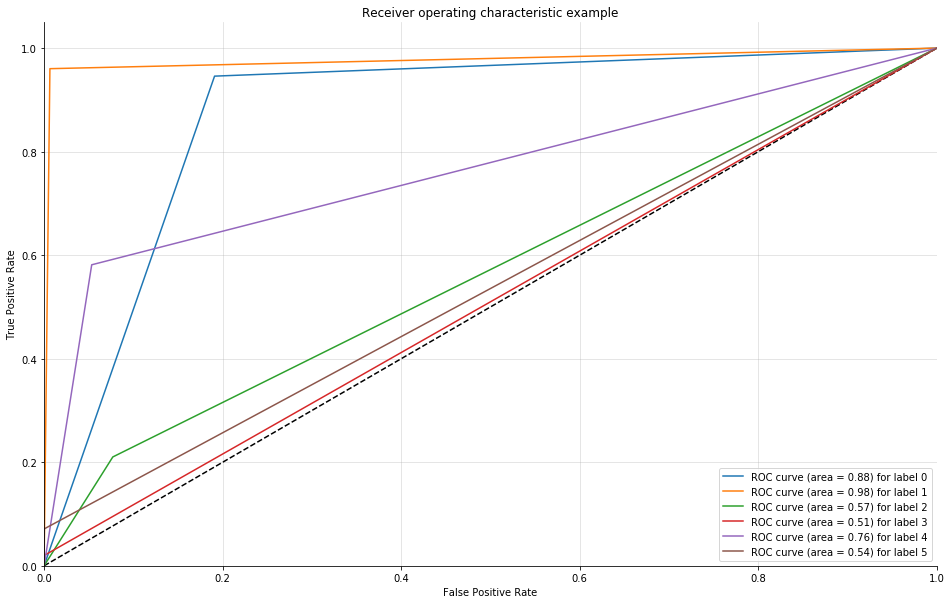

In [38]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

def plot_multiclass_roc(y_result, y_test, n_classes, figsize=(17, 6)):
    
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_roc = label_binarize(y_test, classes=[0, 1, 3, 5, 6, 7])
    y_result_roc = label_binarize(y_result, classes=[0, 1, 3, 5, 6, 7])
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_result_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(result, y_testknn, n_classes=6, figsize=(16, 10))

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[13370    10   407     2   346     1]
 [    0   338     1     9     0     4]
 [  815     1   357     1   524     0]
 [    0    47     0     1     0     0]
 [    0     0   878     1  1221     0]
 [    0    60     0     5     0     5]]


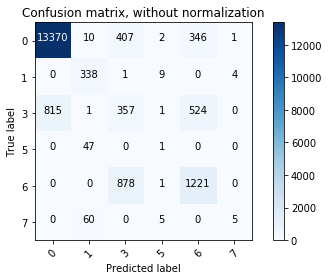

In [40]:
cnf_matrix = metrics.confusion_matrix(y_testknn, result,labels=[0, 1, 3, 5, 6, 7])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 3, 5, 6, 7],
                      title='Confusion matrix, without normalization')

# VAE SOFTMAX

In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv (r'C:/Users/Boaz/Documents/new_data_label.csv')
del dataset['Unnamed: 0']
del dataset['event_date']
# dataset.loc[dataset['labels'] != 0, 'labels'] = 1
# dataset.loc[dataset['labels'] == 0, 'labels'] = 0
#print(dataset)


data = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del data['Unnamed: 0']
del data['event_date']
del data['labels']
#print(data)

In [2]:
import pandas as pd
import numpy as np
datasets = pd.read_csv (r'C:/Users/Boaz/Documents/new_data_label.csv')
del datasets['Unnamed: 0']
del datasets['event_date']
#print(datasets)


datas = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del datas['Unnamed: 0']
del datas['event_date']
del datas['labels']
#print(datas)

In [3]:
Y= datasets['labels']
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

dummy_y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datas, dummy_y, test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

In [13]:
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Input, Dense 
from keras.utils import np_utils 
import numpy as np
import time
t = time.time()
input_img = Input(shape=(5,))

x = Dense(5, activation='relu')(input_img)

encoded = Dense(5, activation='relu')(x)

encoded1 = Dense(3, activation='relu')(encoded)

encoded2 = Dense(2, activation='relu')(encoded1)

y = Dense(6, activation='relu')(x)

decoded = Dense(5, activation='relu')(y)

decoded1 = Dense(3, activation='relu')(decoded)

decoded2 = Dense(2, activation='relu')(decoded1)


z = Dense(5, activation='sigmoid')(decoded)
model = Model(input_img, z)

model.compile(optimizer='adam', loss='mse') # reporting the accuracy

model.fit(X_train, X_train,
      epochs=10,
      batch_size=128,
      shuffle=True,
      validation_data=(X_test, X_test))

mid = Model(input_img, y)
reduced_representation =mid.predict(X_test)

out = Dense(6, activation='softmax')(y)
reduced = Model(input_img, out)
reduced.compile(loss='categorical_crossentropy',
          optimizer='adam', 
          metrics=['accuracy']) 

reduced.fit(X_train, y_train,
      epochs=30,
      batch_size=128,
      shuffle=True,
      validation_data=(X_test, y_test))

scores = reduced.evaluate(X_test, y_test, verbose=1) 
elapsed = time.time() - t
print("Accuracy: ", scores[1])

Epoch 1/10
336/336 [==============================] - 1s 1ms/step - loss: 180182759141948992.0000 - val_loss: 192403556924391424.0000
Epoch 2/10
336/336 [==============================] - 0s 797us/step - loss: 181374796166882368.0000 - val_loss: 192403556924391424.0000
Epoch 3/10
336/336 [==============================] - 0s 771us/step - loss: 179641324043397344.0000 - val_loss: 192403556924391424.0000
Epoch 4/10
336/336 [==============================] - 0s 785us/step - loss: 185458658224436768.0000 - val_loss: 192403556924391424.0000
Epoch 5/10
336/336 [==============================] - 0s 748us/step - loss: 189325201283679168.0000 - val_loss: 192403556924391424.0000
Epoch 6/10
336/336 [==============================] - 0s 753us/step - loss: 184875352088717760.0000 - val_loss: 192403556924391424.0000
Epoch 7/10
336/336 [==============================] - 0s 785us/step - loss: 188953365522349504.0000 - val_loss: 192403556924391424.0000
Epoch 8/10
336/336 [==============================

In [14]:
y_pred = model.predict(X_test)
y_pred_new=  np.argmax(y_pred,axis=1)
y_pred_new

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
count = 0
for x in y_pred_new:
    if x != 0:
        #print(x)
        count += 1
print(count)

0


In [16]:
# ONE HOT ENCODER BACK TO INTEGERS
y_test
a = y_test
y_test_new = [np.where(r==1)[0][0] for r in a]
for i in range(len(y_test_new)):
    if y_test_new[i] == 2:
        y_test_new[i] = 3
        
    elif y_test_new[i] == 3:
        y_test_new[i] = 5
        
    elif y_test_new[i] == 4:
        y_test_new[i] = 6
        
    elif y_test_new[i] == 5:
        y_test_new[i] = 7

y_test_new

[0,
 0,
 0,
 0,
 3,
 6,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 6,
 0,
 1,
 0,
 0,
 3,
 0,
 3,
 5,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 0,
 3,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 3,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 7,
 1,
 0,
 6,
 0,
 0,
 0,
 3,
 3,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 6,
 0,
 1,
 0,
 3,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 6,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 3,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 6,
 0,
 0,
 0,
 6,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,


In [17]:
for i in range(len(y_pred_new)):
    if y_pred_new[i] == 0:
        y_pred_new[i] = 0
    elif y_pred_new[i] == 1:
        y_pred_new[i] = 1
    elif y_pred_new[i] == 2:
        y_pred_new[i] = 3
        
    elif y_pred_new[i] == 3:
        y_pred_new[i] = 5
        
    elif y_pred_new[i] == 4:
        y_pred_new[i] = 6
        
    elif y_pred_new[i] == 5:
        y_pred_new[i] = 7

In [18]:
count = 0
for x in y_pred_new:
    if x != 0:
        count += 1
print(count)

0


In [19]:
from sklearn import metrics
print("F1:",metrics.f1_score(y_test_new,y_pred_new,labels=[0,1,3,5,6,7],average=None))
print('\nDuration in seconds:')
print(elapsed)

F1: [0.86883835 0.         0.         0.         0.         0.        ]

Duration in seconds:
13.19387936592102


In [21]:
from sklearn.preprocessing import label_binarize

y_test_roc = label_binarize(y_test_new, classes=[0,1,3,5,6,7])
y_result_roc = label_binarize(y_pred_new, classes=[0,1,3,5,6,7])
metrics.roc_auc_score(y_test_roc, y_result_roc, average=None, multi_class='ovr', labels=[0,1,3,5,6,7])

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

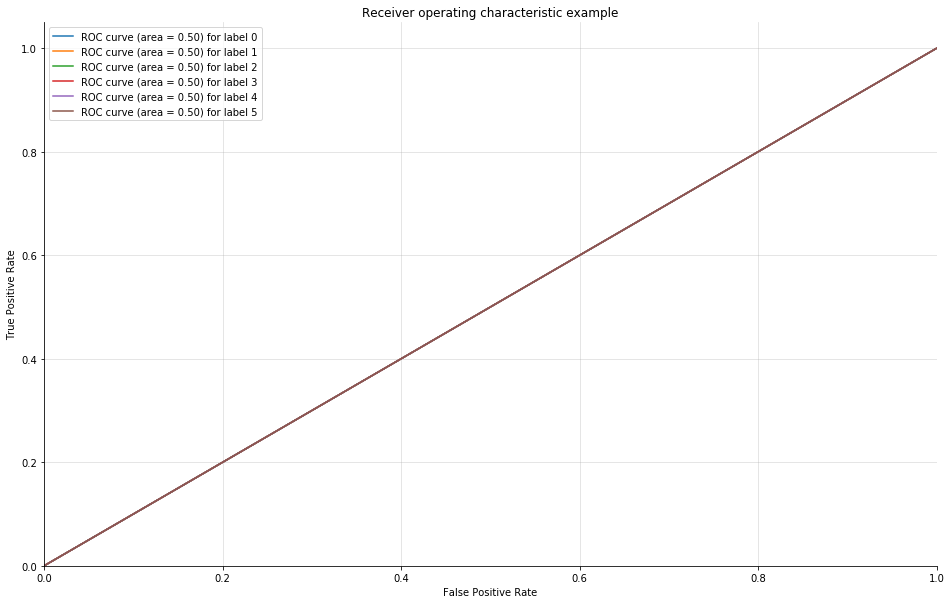

In [23]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
def plot_multiclass_roc(y_result, y_test, n_classes, figsize=(17, 6)):
    
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_roc = label_binarize(y_test, classes=[0, 1, 3, 5, 6, 7])
    y_result_roc = label_binarize(y_result, classes=[0, 1, 3, 5, 6, 7])
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_result_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(y_pred_new, y_test_new, n_classes=6, figsize=(16, 10))

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[14136     0     0     0     0     0]
 [  345     0     0     0     0     0]
 [ 1708     0     0     0     0     0]
 [   61     0     0     0     0     0]
 [ 2085     0     0     0     0     0]
 [   69     0     0     0     0     0]]


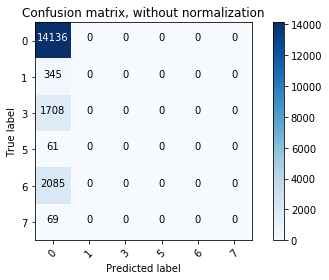

In [26]:
cnf_matrix = metrics.confusion_matrix(y_test_new, y_pred_new,labels=[0, 1, 3, 5, 6, 7])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 3, 5, 6, 7],
                      title='Confusion matrix, without normalization')

# FCN

In [53]:
# FCN model
# when tuning start with learning rate->mini_batch_size -> 
# momentum-> #hidden_units -> # learning_rate_decay -> #layers 
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import time 

from utils.utils import save_logs
from utils.utils import calculate_metrics

class FCN:

    def __init__(self, output_directory, input_shape, nb_classes, verbose=False,build=True):
        self.output_directory = output_directory
        if build == True:
            self.model = self.build_model(input_shape, nb_classes)
            if(verbose==True):
                self.model.summary()
            self.verbose = verbose
            self.model.save_weights(self.output_directory+'model_init.hdf5')
            return

    def build_model(self, input_shape, nb_classes):
        input_layer = keras.layers.Input(shape = (5,1,))
        conv1 = keras.layers.Conv1D(filters=32, kernel_size=8, padding='same',input_shape=[None,input_layer])(input_layer)
        conv1 = keras.layers.BatchNormalization()(conv1)
        conv1 = keras.layers.Activation(activation='relu')(conv1)

        conv2 = keras.layers.Conv1D(filters=256, kernel_size=4, padding='same')(conv1)
        conv2 = keras.layers.BatchNormalization()(conv2)
        conv2 = keras.layers.Activation('relu')(conv2)

        conv3 = keras.layers.Conv1D(128, kernel_size=3,padding='same')(conv2)
        conv3 = keras.layers.BatchNormalization()(conv3)
        conv3 = keras.layers.Activation('relu')(conv3)

        gap_layer = keras.layers.GlobalAveragePooling1D()(conv3)
        
        output_layer = keras.layers.Dense(nb_classes, activation='softmax')(gap_layer)

        model = keras.models.Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(), 
            metrics=['accuracy'])

        reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, 
            min_lr=0.0001)

        file_path = self.output_directory+'best_model.hdf5'

        model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='loss', 
            save_best_only=True)

        self.callbacks = [reduce_lr,model_checkpoint]

        return model 

    def fit(self, x_train, y_train, x_val, y_val,y_true):
        if not tf.test.is_gpu_available:
            print('error')
            exit()
        # x_val and y_val are only used to monitor the test loss and NOT for training  
        batch_size = 16
        nb_epochs = 100

        mini_batch_size = int(min(x_train.shape[0]/10, batch_size))

        start_time = time.time() 

        hist = self.model.fit(x_train, y_train, batch_size=mini_batch_size, epochs=nb_epochs,
            verbose=self.verbose, validation_data=(x_val,y_val), callbacks=self.callbacks)
        
        duration = time.time() - start_time

        self.model.save(self.output_directory+'last_model.hdf5')

        model = keras.models.load_model(self.output_directory+'best_model.hdf5')

        y_pred = model.predict(x_val)

        # convert the predicted from binary to integer 
        y_pred = np.argmax(y_pred , axis=1)

        save_logs(self.output_directory, hist, y_pred, y_true, duration)

        keras.backend.clear_session()

    def predict(self, x_test, y_true,x_train,y_train,y_test,return_df_metrics = True):
        model_path = self.output_directory + 'best_model.hdf5'
        model = keras.models.load_model(model_path)
        y_pred = model.predict(x_test)
        if return_df_metrics:
            y_pred = np.argmax(y_pred, axis=1)
            df_metrics = calculate_metrics(y_true, y_pred, 0.0)
            return df_metrics
        else:
            return y_pred

In [54]:
import pandas as pd
import numpy as np
dataset = pd.read_csv (r'C:/Users/Boaz/Documents/new_data_label.csv')
del dataset['Unnamed: 0']
del dataset['event_date']
# dataset.loc[dataset['labels'] != 0, 'labels'] = 1
# dataset.loc[dataset['labels'] == 0, 'labels'] = 0
#print(dataset)


data = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del data['Unnamed: 0']
del data['event_date']
del data['labels']
#print(data)

In [55]:
import pandas as pd
import numpy as np
datasets = pd.read_csv (r'C:/Users/Boaz/Documents/new_data_label.csv')
del datasets['Unnamed: 0']
del datasets['event_date']
#print(datasets)


datas = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del datas['Unnamed: 0']
del datas['event_date']
del datas['labels']
#print(datas)

In [56]:
Y= datasets['labels']
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

dummy_y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datas, dummy_y, test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

In [58]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import time 
t = time.time()
model = FCN(r'C:/Users/Boaz/Documents/', 5, 6)
model = model.build_model(5, 6)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 5, 1)]            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5, 32)             288       
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 32)             128       
_________________________________________________________________
activation_3 (Activation)    (None, 5, 32)             0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 5, 256)            33024     
_________________________________________________________________
batch_normalization_4 (Batch (None, 5, 256)            1024      
_________________________________________________________________
activation_4 (Activation)    (None, 5, 256)            0   

In [71]:
model.fit(X_train, y_train, batch_size=16, epochs=30,
            verbose=1)
elapsed = time.time() - t

Epoch 1/30
2684/2684 [==============================] - 7s 2ms/step - loss: 0.6487 - accuracy: 0.7807
Epoch 2/30
2684/2684 [==============================] - 6s 2ms/step - loss: 0.6486 - accuracy: 0.7800
Epoch 3/30
2684/2684 [==============================] - 6s 2ms/step - loss: 0.6481 - accuracy: 0.7811: 0s - los
Epoch 4/30
2684/2684 [==============================] - 6s 2ms/step - loss: 0.6474 - accuracy: 0.7810
Epoch 5/30
2684/2684 [==============================] - 6s 2ms/step - loss: 0.6458 - accuracy: 0.7806
Epoch 6/30
2684/2684 [==============================] - 6s 2ms/step - loss: 0.6485 - accuracy: 0.7803
Epoch 7/30
2684/2684 [==============================] - 6s 2ms/step - loss: 0.6496 - accuracy: 0.7803
Epoch 8/30
2684/2684 [==============================] - 6s 2ms/step - loss: 0.6471 - accuracy: 0.7803
Epoch 9/30
2684/2684 [==============================] - 6s 2ms/step - loss: 0.6482 - accuracy: 0.7803
Epoch 10/30
2684/2684 [==============================] - 6s 2ms/step - l

In [72]:
# PREDICTION WHICH LABEL
y_pred = model.predict(X_test)
y_pred_new=  np.argmax(y_pred,axis=1)
y_pred_new

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
count = 0
for x in y_pred_new:
    if x != 0:
        #print(x)
        count += 1
print(count)

277


In [74]:
# ONE HOT ENCODER BACK TO INTEGERS
y_test
a = y_test
y_test_new = [np.where(r==1)[0][0] for r in a]
for i in range(len(y_test_new)):
    if y_test_new[i] == 2:
        y_test_new[i] = 3
        
    elif y_test_new[i] == 3:
        y_test_new[i] = 5
        
    elif y_test_new[i] == 4:
        y_test_new[i] = 6
        
    elif y_test_new[i] == 5:
        y_test_new[i] = 7

y_test_new

[0,
 0,
 0,
 0,
 3,
 6,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 6,
 0,
 1,
 0,
 0,
 3,
 0,
 3,
 5,
 3,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 0,
 3,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 3,
 0,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 7,
 1,
 0,
 6,
 0,
 0,
 0,
 3,
 3,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 6,
 0,
 1,
 0,
 3,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 6,
 0,
 0,
 0,
 0,
 0,
 6,
 6,
 0,
 3,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 6,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 6,
 0,
 0,
 0,
 6,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,


In [75]:
for i in range(len(y_pred_new)):
    if y_pred_new[i] == 0:
        y_pred_new[i] = 0
    elif y_pred_new[i] == 1:
        y_pred_new[i] = 1
    elif y_pred_new[i] == 2:
        y_pred_new[i] = 3
        
    elif y_pred_new[i] == 3:
        y_pred_new[i] = 5
        
    elif y_pred_new[i] == 4:
        y_pred_new[i] = 6
        
    elif y_pred_new[i] == 5:
        y_pred_new[i] = 7


In [76]:
count = 0
for x in y_pred_new:
    if x != 0:
        count += 1
print(count)

277


In [77]:
from sklearn import metrics
print("F1:",metrics.f1_score(y_test_new,y_pred_new,labels=[0,1,3,5,6,7],average=None))
print('\nDuration in seconds:')
print(elapsed)

F1: [0.88 0.61 0.   0.   0.   0.14]

Duration in seconds:
1060.9938910007477


In [78]:
metrics.multilabel_confusion_matrix(y_pred_new, y_test_new, labels =[0,1,3,5,6,7])


array([[[  268,     9],
        [ 4000, 14127]],

       [[17976,   156],
        [   83,   189]],

       [[16696,  1708],
        [    0,     0]],

       [[18343,    61],
        [    0,     0]],

       [[16319,  2085],
        [    0,     0]],

       [[18335,    64],
        [    0,     5]]], dtype=int64)

In [80]:
from sklearn.preprocessing import label_binarize

y_test_roc = label_binarize(y_test_new, classes=[0,1,3,5,6,7])
y_result_roc = label_binarize(y_pred_new, classes=[0,1,3,5,6,7])
metrics.roc_auc_score(y_test_roc, y_result_roc, average=None, multi_class='ovr', labels=[0,1,3,5,6,7])

array([0.53, 0.77, 0.5 , 0.5 , 0.5 , 0.54])

C:\Users\Boaz\anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


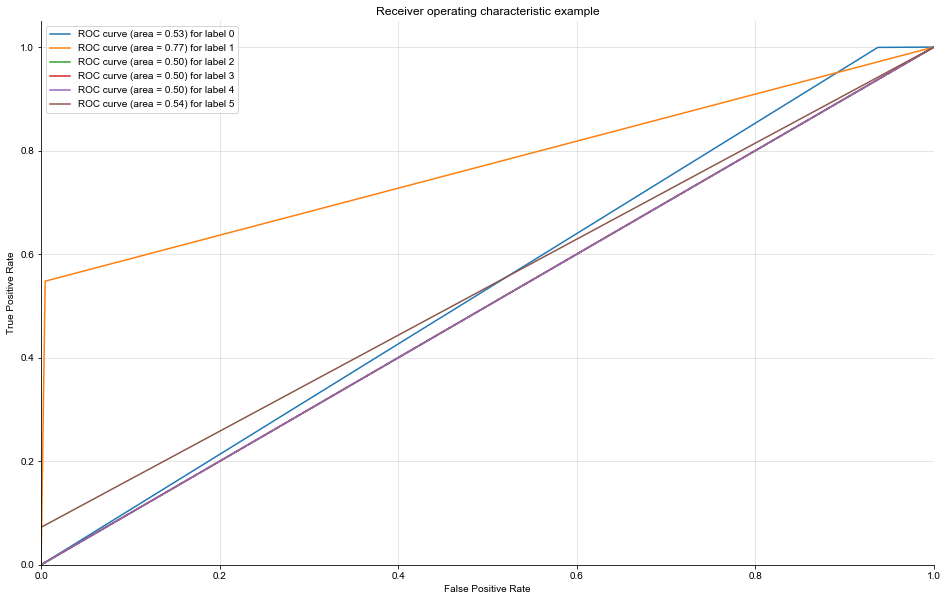

In [81]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
#matplotlib.use('Qt5Agg')

def plot_multiclass_roc(y_result, y_test, n_classes, figsize=(17, 6)):
    
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_roc = label_binarize(y_test, classes=[0, 1, 3, 5, 6, 7])
    y_result_roc = label_binarize(y_result, classes=[0, 1, 3, 5, 6, 7])
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_result_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(y_pred_new, y_test_new, n_classes=6, figsize=(16, 10))

In [82]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[14127     9     0     0     0     0]
 [  156   189     0     0     0     0]
 [ 1705     3     0     0     0     0]
 [   31    30     0     0     0     0]
 [ 2082     3     0     0     0     0]
 [   26    38     0     0     0     5]]


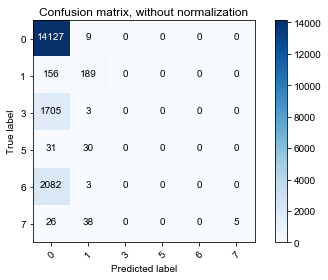

In [83]:
cnf_matrix = metrics.confusion_matrix(y_test_new, y_pred_new,labels=[0, 1, 3, 5, 6, 7])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 3, 5, 6, 7],
                      title='Confusion matrix, without normalization')

# RESNET

In [84]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import time

import matplotlib
from utils.utils import save_test_duration
import matplotlib.pyplot as plt

from utils.utils import save_logs
from utils.utils import calculate_metrics
class RESNET:

    def __init__(self, output_directory, input_shape, nb_classes, verbose=False, build=True, load_weights=False):
        self.output_directory = output_directory
        if build == True:
            self.model = self.build_model(input_shape, nb_classes)
            if (verbose == True):
                self.model.summary()
            self.verbose = verbose
            if load_weights == True:
                self.model.load_weights(self.output_directory
                                        .replace('resnet_augment', 'resnet')
                                        .replace('TSC_itr_augment_x_10', 'TSC_itr_10')
                                        + '/model_init.hdf5')
            else:
                self.model.save_weights(self.output_directory + 'model_init.hdf5')
        return

    def build_model(self, input_shape, nb_classes):
        n_feature_maps = 64

        input_layer = keras.layers.Input(shape = (5,1,))

        # BLOCK 1

        conv_x = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=8, padding='same')(input_layer)
        conv_x = keras.layers.BatchNormalization()(conv_x)
        conv_x = keras.layers.Activation('relu')(conv_x)

        conv_y = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=5, padding='same')(conv_x)
        conv_y = keras.layers.BatchNormalization()(conv_y)
        conv_y = keras.layers.Activation('relu')(conv_y)

        conv_z = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=3, padding='same')(conv_y)
        conv_z = keras.layers.BatchNormalization()(conv_z)

        # expand channels for the sum
        shortcut_y = keras.layers.Conv1D(filters=n_feature_maps, kernel_size=1, padding='same')(input_layer)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)

        output_block_1 = keras.layers.add([shortcut_y, conv_z])
        output_block_1 = keras.layers.Activation('relu')(output_block_1)

        # BLOCK 2

        conv_x = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_1)
        conv_x = keras.layers.BatchNormalization()(conv_x)
        conv_x = keras.layers.Activation('relu')(conv_x)

        conv_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = keras.layers.BatchNormalization()(conv_y)
        conv_y = keras.layers.Activation('relu')(conv_y)

        conv_z = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = keras.layers.BatchNormalization()(conv_z)

        # expand channels for the sum
        shortcut_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=1, padding='same')(output_block_1)
        shortcut_y = keras.layers.BatchNormalization()(shortcut_y)

        output_block_2 = keras.layers.add([shortcut_y, conv_z])
        output_block_2 = keras.layers.Activation('relu')(output_block_2)

        # BLOCK 3

        conv_x = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=8, padding='same')(output_block_2)
        conv_x = keras.layers.BatchNormalization()(conv_x)
        conv_x = keras.layers.Activation('relu')(conv_x)

        conv_y = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=5, padding='same')(conv_x)
        conv_y = keras.layers.BatchNormalization()(conv_y)
        conv_y = keras.layers.Activation('relu')(conv_y)

        conv_z = keras.layers.Conv1D(filters=n_feature_maps * 2, kernel_size=3, padding='same')(conv_y)
        conv_z = keras.layers.BatchNormalization()(conv_z)

        # no need to expand channels because they are equal
        shortcut_y = keras.layers.BatchNormalization()(output_block_2)

        output_block_3 = keras.layers.add([shortcut_y, conv_z])
        output_block_3 = keras.layers.Activation('relu')(output_block_3)

        # FINAL

        gap_layer = keras.layers.GlobalAveragePooling1D()(output_block_3)

        output_layer = keras.layers.Dense(nb_classes, activation='softmax')(gap_layer)

        model = keras.models.Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])

        reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=50, min_lr=0.0001)

        file_path = self.output_directory + 'best_model.hdf5'

        model_checkpoint = keras.callbacks.ModelCheckpoint(filepath=file_path, monitor='loss',
                                                           save_best_only=True)

        self.callbacks = [reduce_lr, model_checkpoint]

        return model

    def fit(self, x_train, y_train, x_val, y_val, y_true):
        if not tf.test.is_gpu_available:
            print('error')
            exit()
        # x_val and y_val are only used to monitor the test loss and NOT for training
        batch_size = 64
        nb_epochs = 1500

        mini_batch_size = int(min(x_train.shape[0] / 10, batch_size))

        start_time = time.time()

        hist = self.model.fit(x_train, y_train, batch_size=mini_batch_size, epochs=nb_epochs,
                              verbose=self.verbose, validation_data=(x_val, y_val), callbacks=self.callbacks)

        duration = time.time() - start_time

        self.model.save(self.output_directory + 'last_model.hdf5')

        y_pred = self.predict(x_val, y_true, x_train, y_train, y_val,
                              return_df_metrics=False)

        # save predictions
        np.save(self.output_directory + 'y_pred.npy', y_pred)

        # convert the predicted from binary to integer
        y_pred = np.argmax(y_pred, axis=1)

        df_metrics = save_logs(self.output_directory, hist, y_pred, y_true, duration)

        keras.backend.clear_session()

        return df_metrics

    def predict(self, x_test, y_true, x_train, y_train, y_test, return_df_metrics=True):
        start_time = time.time()
        model_path = self.output_directory + 'best_model.hdf5'
        model = keras.models.load_model(model_path)
        y_pred = model.predict(x_test)
        if return_df_metrics:
            y_pred = np.argmax(y_pred, axis=1)
            df_metrics = calculate_metrics(y_true, y_pred, 0.0)
            return df_metrics
        else:
            test_duration = time.time() - start_time
            save_test_duration(self.output_directory + 'test_duration.csv', test_duration)
            return y_pred


In [85]:
import pandas as pd
import numpy as np
dataset = pd.read_csv (r'C:/Users/Boaz/Documents/new_data_label.csv')
del dataset['Unnamed: 0']
del dataset['event_date']
# dataset.loc[dataset['labels'] != 0, 'labels'] = 1
# dataset.loc[dataset['labels'] == 0, 'labels'] = 0
#print(dataset)


data = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del data['Unnamed: 0']
del data['event_date']
del data['labels']
#print(data)

In [86]:
import pandas as pd
import numpy as np
datasets = pd.read_csv (r'C:/Users/Boaz/Documents/new_data_label.csv')
del datasets['Unnamed: 0']
del datasets['event_date']
#print(datasets)


datas = pd.read_csv(r'C:/Users/Boaz/Documents/new_data_label.csv')
del datas['Unnamed: 0']
del datas['event_date']
del datas['labels']
#print(datas)

In [87]:
Y= datasets['labels']
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

dummy_y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datas, dummy_y, test_size=0.3,random_state=109,stratify=dataset['labels']) # 70% training and 30% test

In [89]:
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import time 
t = time.time()
model = RESNET(r'C:/Users/Boaz/Documents/', 5, 6)
model = model.build_model(5, 6)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 5, 1)]       0                                            
__________________________________________________________________________________________________
conv1d_17 (Conv1D)              (None, 5, 64)        576         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_18 (BatchNo (None, 5, 64)        256         conv1d_17[0][0]                  
__________________________________________________________________________________________________
activation_15 (Activation)      (None, 5, 64)        0           batch_normalization_18[0][0]     
____________________________________________________________________________________________

In [90]:
model.fit(X_train, y_train, batch_size=16, epochs=30,
            verbose=1)
elapsed = time.time() - t

Epoch 1/30
2684/2684 [==============================] - 19s 7ms/step - loss: 0.7126 - accuracy: 0.7769
Epoch 2/30
2684/2684 [==============================] - 17s 6ms/step - loss: 0.6959 - accuracy: 0.7785
Epoch 3/30
2684/2684 [==============================] - 18s 7ms/step - loss: 0.6923 - accuracy: 0.7790
Epoch 4/30
2684/2684 [==============================] - 19s 7ms/step - loss: 0.6875 - accuracy: 0.7798
Epoch 5/30
2684/2684 [==============================] - 18s 7ms/step - loss: 0.6828 - accuracy: 0.7793
Epoch 6/30
2684/2684 [==============================] - 18s 7ms/step - loss: 0.6703 - accuracy: 0.7797
Epoch 7/30
2684/2684 [==============================] - 18s 7ms/step - loss: 0.6612 - accuracy: 0.7801
Epoch 8/30
2684/2684 [==============================] - 18s 7ms/step - loss: 0.6584 - accuracy: 0.7799
Epoch 9/30
2684/2684 [==============================] - 18s 7ms/step - loss: 0.6553 - accuracy: 0.7800
Epoch 10/30
2684/2684 [==============================] - 19s 7ms/step - l

In [91]:
y_pred = model.predict(X_test)
y_pred_new=  np.argmax(y_pred,axis=1)
y_pred_new

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [92]:
count = 0
for x in y_pred_new:
    if x != 0:
        #print(x)
        count += 1
print(count)

298


In [93]:
y_test
a = y_test
y_test_new = [np.where(r==1)[0][0] for r in a]
for i in range(len(y_test_new)):
    if y_test_new[i] == 2:
        y_test_new[i] = 3
        
    elif y_test_new[i] == 3:
        y_test_new[i] = 5
        
    elif y_test_new[i] == 4:
        y_test_new[i] = 6
        
    elif y_test_new[i] == 5:
        y_test_new[i] = 7

#y_test_new

In [94]:
for i in range(len(y_pred_new)):
    if y_pred_new[i] == 0:
        y_pred_new[i] = 0
    elif y_pred_new[i] == 1:
        y_pred_new[i] = 1
    elif y_pred_new[i] == 2:
        y_pred_new[i] = 3
        
    elif y_pred_new[i] == 3:
        y_pred_new[i] = 5
        
    elif y_pred_new[i] == 4:
        y_pred_new[i] = 6
        
    elif y_pred_new[i] == 5:
        y_pred_new[i] = 7


In [95]:
count = 0
for x in y_pred_new:
    if x != 0:
        count += 1
print(count)

298


In [98]:
from sklearn import metrics
print("F1:",metrics.f1_score(y_test_new,y_pred_new,labels=[0,1,3,5,6,7],average='weighted'))
print('\nDuration in seconds:')
print(elapsed)

F1: 0.6863163684843621

Duration in seconds:
561.3688275814056


In [99]:
metrics.multilabel_confusion_matrix(y_pred_new, y_test_new, labels =[0,1,3,5,6,7])

array([[[  298,     0],
        [ 3970, 14136]],

       [[17988,   141],
        [   71,   204]],

       [[16696,  1708],
        [    0,     0]],

       [[18343,    61],
        [    0,     0]],

       [[16308,  2085],
        [   11,     0]],

       [[18328,    64],
        [    7,     5]]], dtype=int64)

In [100]:
from sklearn.preprocessing import label_binarize

y_test_roc = label_binarize(y_test_new, classes=[0,1,3,5,6,7])
y_result_roc = label_binarize(y_pred_new, classes=[0,1,3,5,6,7])
metrics.roc_auc_score(y_test_roc, y_result_roc, average=None, multi_class='ovr', labels=[0,1,3,5,6,7])

array([0.53, 0.79, 0.5 , 0.5 , 0.5 , 0.54])

C:\Users\Boaz\anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


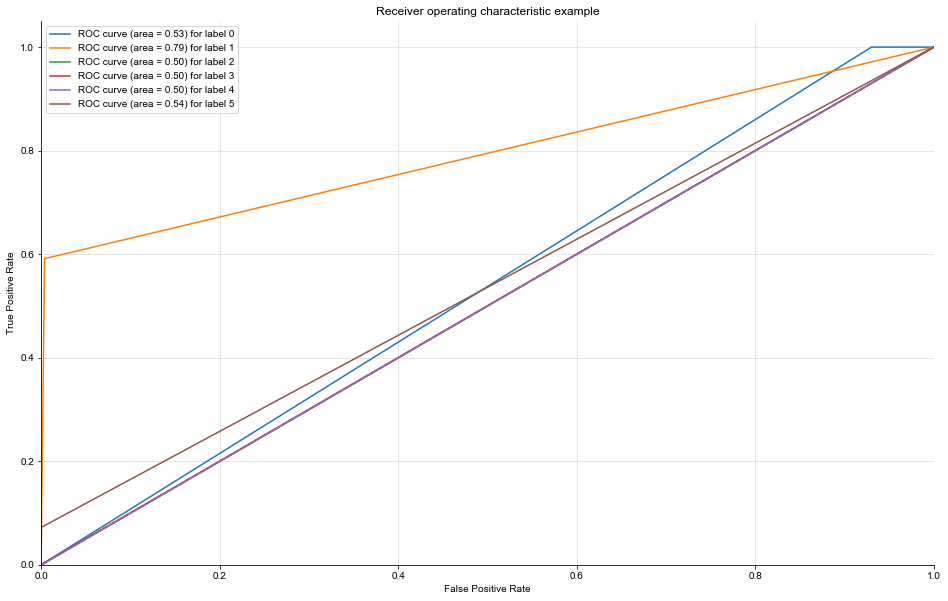

In [101]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
#matplotlib.use('agg')
def plot_multiclass_roc(y_result, y_test, n_classes, figsize=(17, 6)):
    
    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_roc = label_binarize(y_test, classes=[0, 1, 3, 5, 6, 7])
    y_result_roc = label_binarize(y_result, classes=[0, 1, 3, 5, 6, 7])
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_result_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

plot_multiclass_roc(y_pred_new, y_test_new, n_classes=6, figsize=(16, 10))

In [103]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[14136     0     0     0     0     0]
 [  128   204     0     0     8     5]
 [ 1708     0     0     0     0     0]
 [   27    31     0     0     1     2]
 [ 2085     0     0     0     0     0]
 [   22    40     0     0     2     5]]


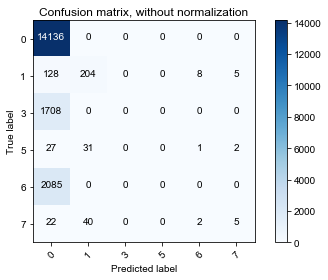

In [104]:
cnf_matrix = metrics.confusion_matrix(y_test_new, y_pred_new,labels=[0, 1, 3, 5, 6, 7])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0, 1, 3, 5, 6, 7],
                      title='Confusion matrix, without normalization')